In [152]:
#Required libraries for EDA

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [154]:
#read the dataset of "Banking campaigns" in data
data = pd.read_csv("Casestudy Data.csv")

#printing the head and tail of the data
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [155]:
data.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [156]:
#dropping records with age missing
data = data[~data.age.isnull()].copy()
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    4672
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [157]:
#dropping cons.price.idx records missing in the dataset
data = data[~data['cons.price.idx'].isnull()].copy()

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [158]:
#columns in dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [159]:
data.shape

(32772, 21)

In [160]:
#finding the amount of unique values in each column
for cols in data.columns:
    print(cols)
    print(data[cols].unique)
    print("--" * 50)

age
<bound method Series.unique of 0        56.0
1        57.0
3        40.0
5        45.0
6        59.0
         ... 
41181    37.0
41183    73.0
41184    46.0
41186    44.0
41187    74.0
Name: age, Length: 32772, dtype: float64>
----------------------------------------------------------------------------------------------------
job
<bound method Series.unique of 0          housemaid
1           services
3             admin.
5           services
6             admin.
            ...     
41181         admin.
41183        retired
41184    blue-collar
41186     technician
41187        retired
Name: job, Length: 32772, dtype: object>
----------------------------------------------------------------------------------------------------
marital
<bound method Series.unique of 0        married
1        married
3        married
5        married
6        married
          ...   
41181    married
41183    married
41184    married
41186    married
41187    married
Name: marital, Length: 32772, dtyp

In [161]:
# List of numerical columns in the dataset
nums = list(data.select_dtypes(exclude=['object']))
nums

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [162]:
# List of categorical columns in the dataset
category_cols = list(data.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

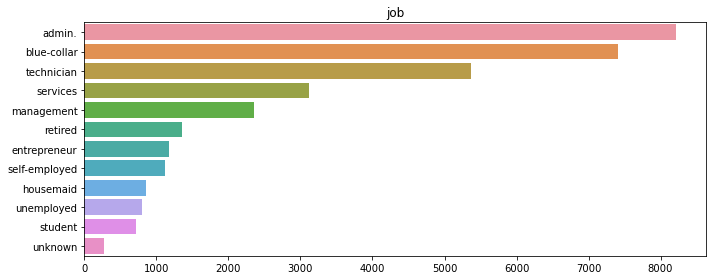

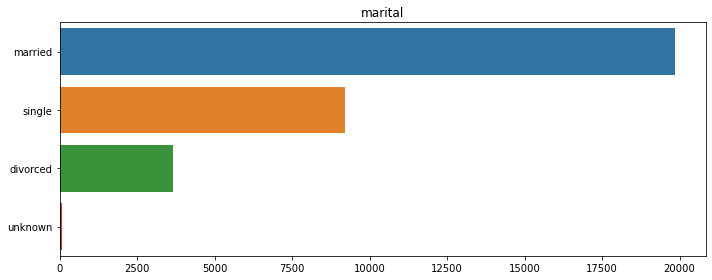

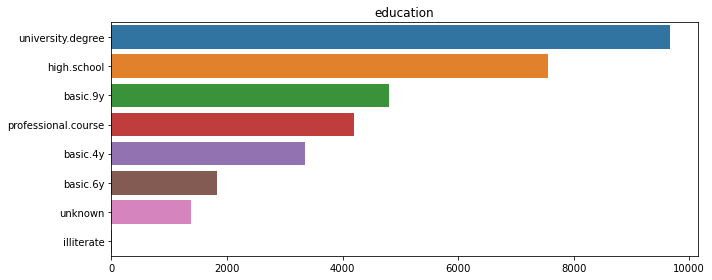

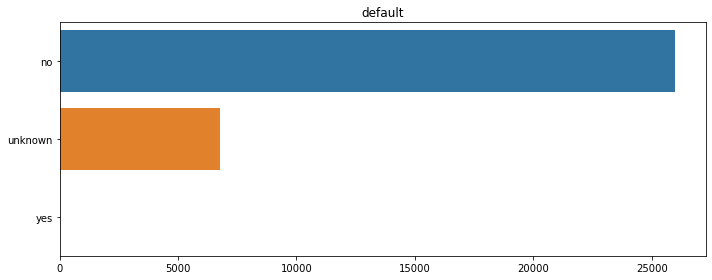

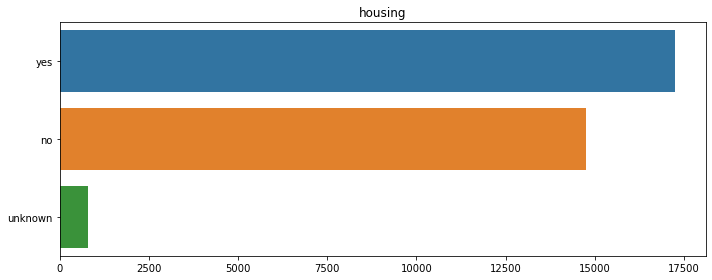

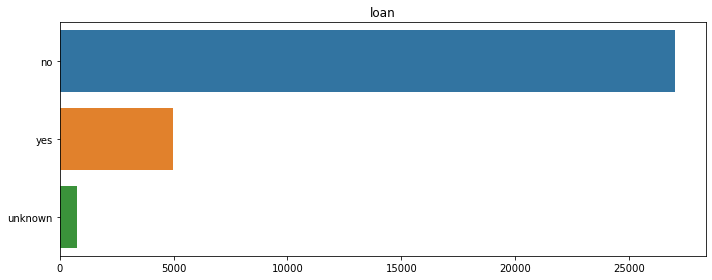

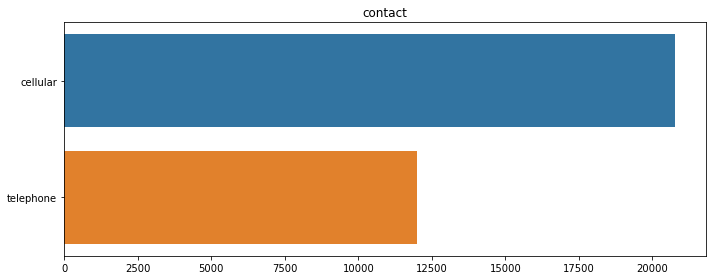

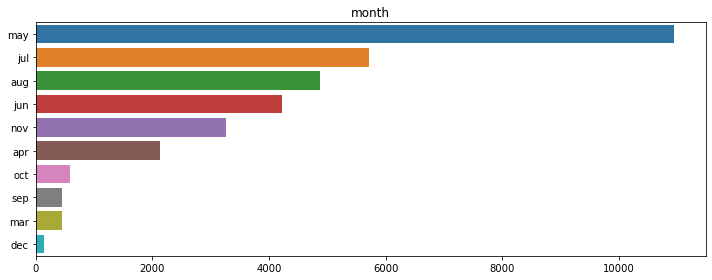

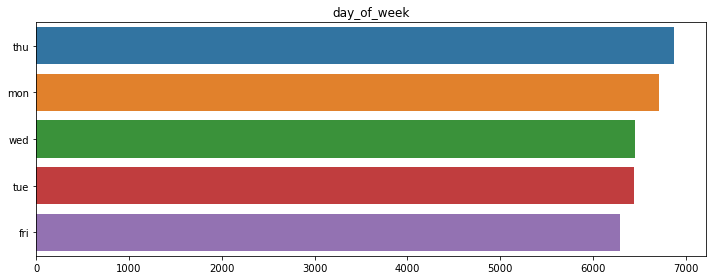

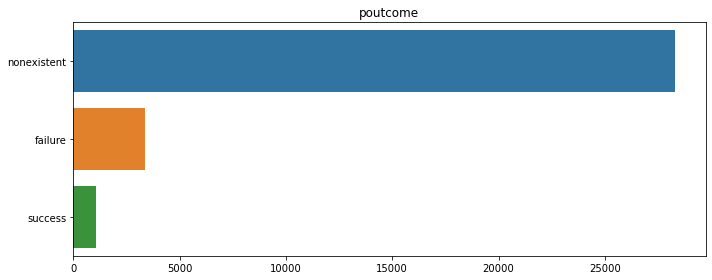

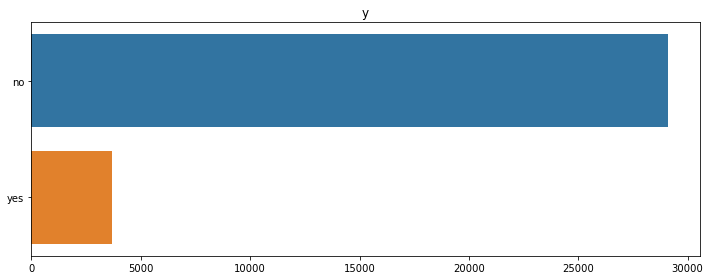

In [163]:
#plotting the bar grah to find out the number of occurances of values in each categorical column
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

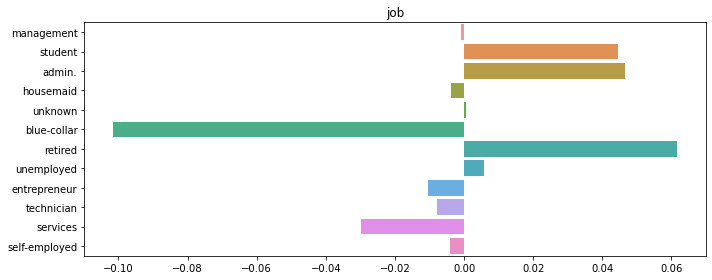

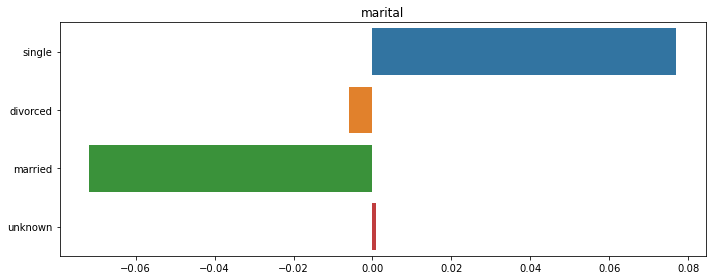

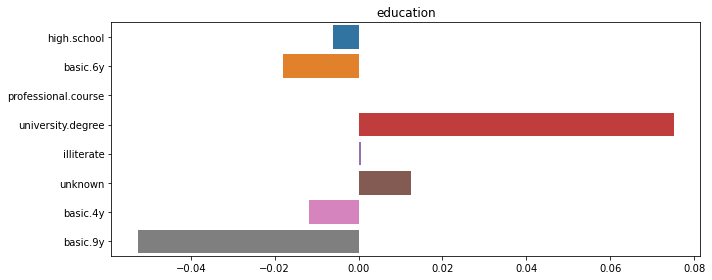

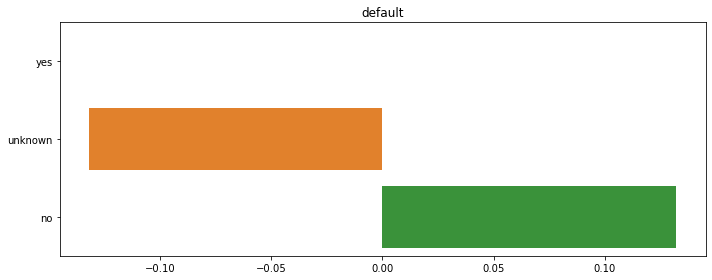

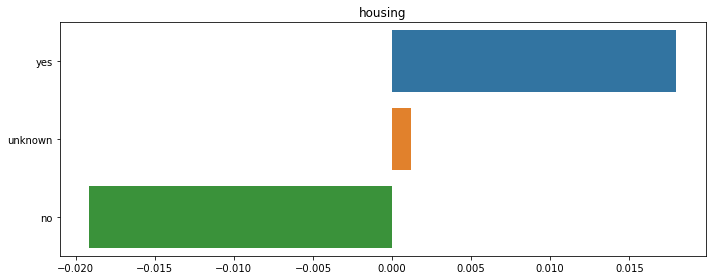

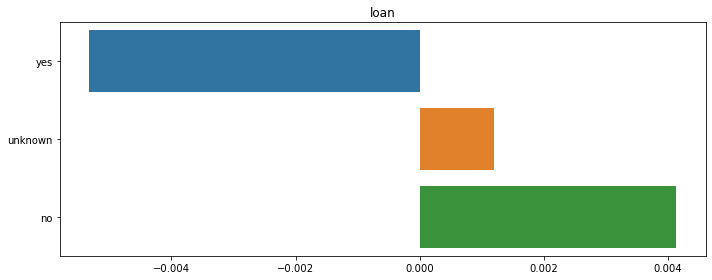

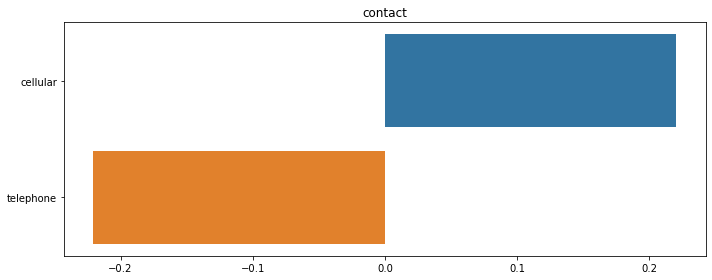

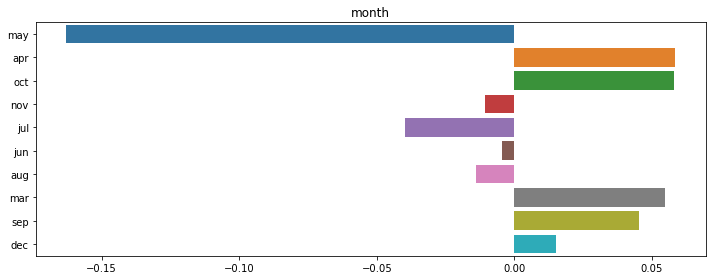

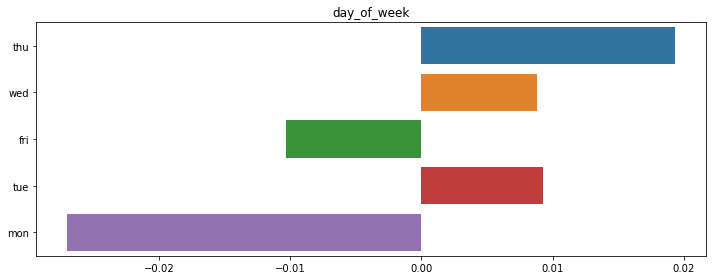

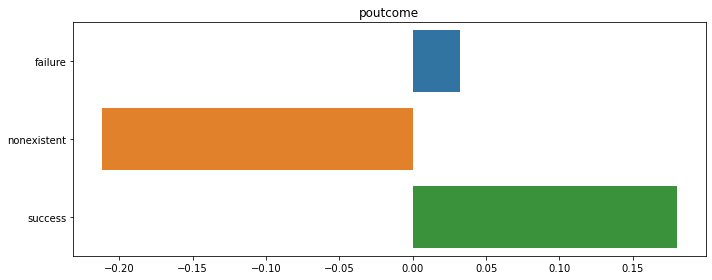

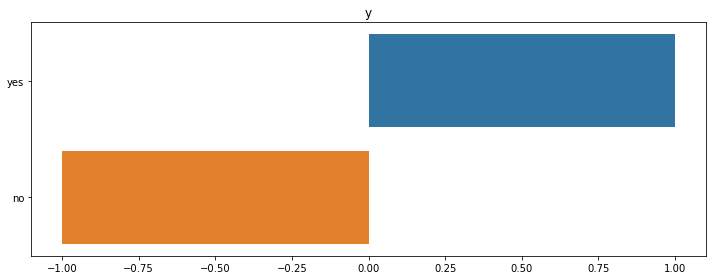

In [164]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = data.loc[data['y'].values == 'yes', col].value_counts() 
    neg_counts = data.loc[data['y'].values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (data['y'].values == 'yes').sum()
    freq_neg = (data['y'].values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [165]:
#let us plot some pair plots and analyse the data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

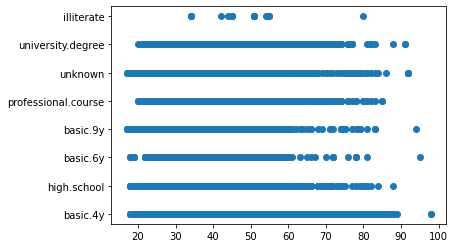

In [166]:
plt.scatter(data.age,data.education)
plt.show()

In [167]:
# let us analyse the yes count of on loan column by diving the age into 5 parts with a difference of 10
a1=data[(data['age']>=18) & (data['age']<=28)]
a2=data[(data['age']>=29) & (data['age']<=39)]
a3=data[(data['age']>=40) & (data['age']<=50)]
a4=data[(data['age']>=51) & (data['age']<=60)]
a5=data[(data['age']>=61)]

In [168]:
total=[]
list1=[a1,a2,a3,a4,a5]
for i in list1:
  total.append(i.shape[0])
yes_count=[]
for i in list1:
  yes_count.append(i[i['y']=='yes'].count()['y'])

In [169]:
age_final=pd.DataFrame()
age_final['Age Groups']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percetage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percetage',ascending=False)

,Age Groups,Total,Yes Count,Percetage
4,61+,720,330,45.833333
0,18-28,3344,571,17.075359
3,51-60,5011,546,10.896029
1,29-39,14653,1514,10.332355
2,40-50,9039,719,7.954420


In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.swarmplot(a1['age'],a1['campaign'],hue=a1['y'])
plt.subplot(3,2,2)
sns.swarmplot(a2['age'],a2['campaign'],hue=a2['y'])
plt.subplot(3,2,3)
sns.swarmplot(a3['age'],a3['campaign'],hue=a3['y'])
plt.subplot(3,2,4)
sns.swarmplot(a4['age'],a4['campaign'],hue=a4['y'])
plt.subplot(3,2,5)
sns.swarmplot(a5['age'],a5['campaign'],hue=a5['y'])

In [99]:
#Let us analyse on the job type column now

In [100]:
data['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

In [101]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in data['job'].value_counts().index:
    df_job=pd.DataFrame()
    df_job=data[data['job']==i]
    title.append(i)
    total_count_in_each_group.append(df_job.shape[0])
    yes_count.append(df_job[df_job['y']=='yes'].count()['y'])
    no_count.append(df_job[df_job['y']=='no'].count()['y'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,admin.,8215,1075,7140
1,blue-collar,7408,500,6908
2,technician,5374,578,4796
3,services,3121,253,2868
4,management,2361,262,2099
5,retired,1356,354,1002
6,entrepreneur,1175,98,1077
7,self-employed,1118,112,1006
8,housemaid,859,84,775
9,unemployed,806,109,697


([<matplotlib.axis.XTick at 0x7fee687da460>,
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

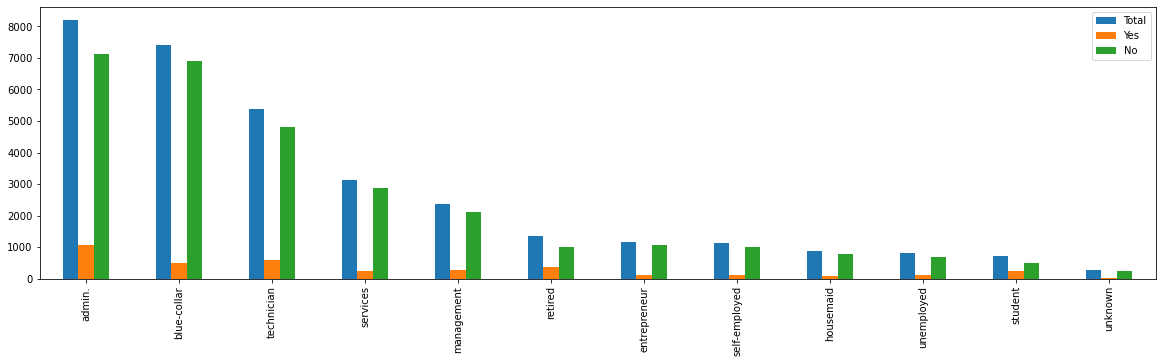

In [102]:
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [103]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,student,31.690141,68.309859
5,retired,26.106195,73.893805
9,unemployed,13.523573,86.476427
0,admin.,13.085819,86.914181
11,unknown,11.895911,88.104089
4,management,11.096993,88.903007
2,technician,10.755489,89.244511
7,self-employed,10.017889,89.982111
8,housemaid,9.778813,90.221187
6,entrepreneur,8.340426,91.659574


([<matplotlib.axis.XTick at 0x7fee5be0c0a0>,
 [Text(0, 0, 'student'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'unemployed'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'management'),
  Text(6, 0, 'technician'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'services'),
  Text(11, 0, 'blue-collar')])

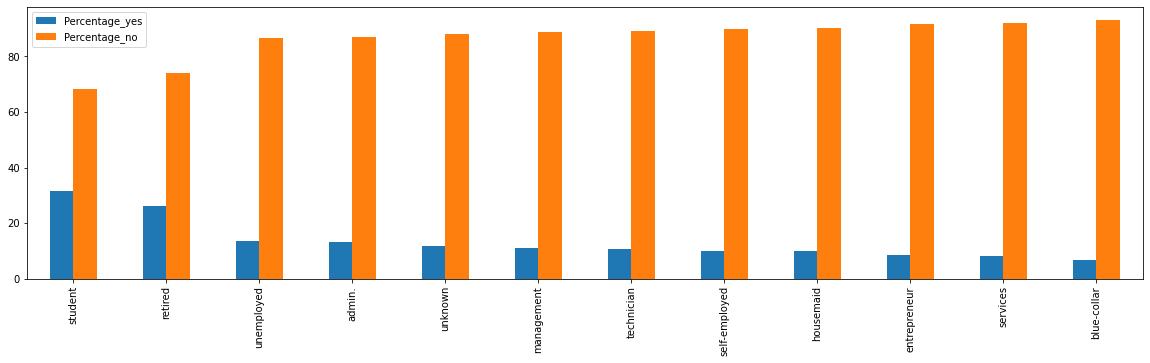

In [104]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [105]:
# 1)From above graph we can see that students and retired people are the clients who have high percentage of of subscription rate.

# 2)Blue-collar,entrepreneur,housemaid,services have low are few jobs that have low subscription rate.

# 3)People with job description as 'Blue-collar' are the most contacted people

# 4)Students are the less contacted people

# 4)We have 288 enteries where job is unknown.

In [106]:
df_married=data[data['marital']=='married']
df_single=data[data['marital']=='single']
df_divorced=data[data['marital']=='divorced']
df_unknown=data[data['marital']=='unknown']
married=data['marital'].value_counts().to_frame()
married

,marital
married,19846
single,9217
divorced,3644
unknown,65


In [107]:
yes_count=[]
yes_count.append(df_married[df_married['y']=='yes'].count()[1])
yes_count.append(df_single[df_single['y']=='yes'].count()[1])
yes_count.append(df_divorced[df_divorced['y']=='yes'].count()[1])
yes_count.append(df_unknown[df_unknown['y']=='yes'].count()[1])
married['Subscription count']=yes_count


<AxesSubplot:>

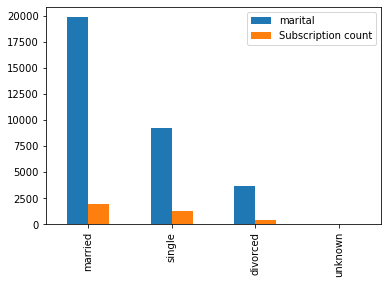

In [108]:
married.plot(kind='bar')

In [109]:
married['Percentage']=(married['Subscription count']/married['marital'])*100
married.sort_values(by='Percentage',ascending=False)

,marital,Subscription count,Percentage
unknown,65,10,15.384615
single,9217,1287,13.963329
divorced,3644,390,10.702525
married,19846,1995,10.052404


In [110]:
# As per the visualization, 'Marital' and y don't have a strong relationship


In [111]:
education=data['education'].value_counts().to_frame()
education

,education
university.degree,9661
high.school,7553
basic.9y,4795
professional.course,4190
basic.4y,3351
basic.6y,1826
unknown,1380
illiterate,16


In [112]:
df_uni=data[data['education']=='university.degree']
df_high_school=data[data['education']=='high.school']
df_basic_9years=data[data['education']=='basic.9y']
df_pro_course=data[data['education']=='professional.course']
df_basic_4years=data[data['education']=='basic.4y']
df_basic_6years=data[data['education']=='basic.6y']
df_unknown=data[data['education']=='unknown']
df_illiterate=data[data['education']=='illiterate']

yes_count=[]
yes_count.append(df_uni[df_uni['y']=='yes'].count()[1])
yes_count.append(df_high_school[df_high_school['y']=='yes'].count()[1])
yes_count.append(df_basic_9years[df_basic_9years['y']=='yes'].count()[1])
yes_count.append(df_unknown[df_unknown['y']=='yes'].count()[1])
yes_count.append(df_pro_course[df_pro_course['y']=='yes'].count()[1])
yes_count.append(df_basic_4years[df_basic_4years['y']=='yes'].count()[1])
yes_count.append(df_basic_6years[df_basic_6years['y']=='yes'].count()[1])
yes_count.append(df_illiterate[df_illiterate['y']=='yes'].count()[1])
education['Subscription count']=yes_count

<AxesSubplot:>

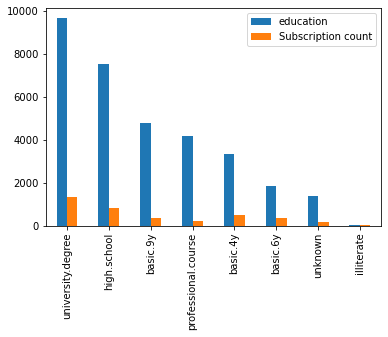

In [113]:
education.plot(kind='bar')

In [114]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education.sort_values(by='Percentage',ascending=False)

,education,Subscription count,Percentage
illiterate,16,4,25.000000
basic.6y,1826,338,18.510405
basic.4y,3351,471,14.055506
university.degree,9661,1331,13.777042
high.school,7553,829,10.975771
unknown,1380,146,10.579710
basic.9y,4795,367,7.653806
professional.course,4190,196,4.677804


In [115]:
# 1)Columns 'education' and 'y' don't show strong relstionship

# 2)Here we have 1380 enteries where education is unknown

In [116]:
success=data[(data['poutcome']=='success')].count()['poutcome']
failure=data[(data['poutcome']=='failure')].count()['poutcome']
nonexistent=data[(data['poutcome']=='nonexistent')].count()['poutcome']
other=data[(data['poutcome']=='other')].count()['poutcome']
previous_campaign=pd.DataFrame({'Status':['Success','Failure','nonexistent'],"Values":[success,failure,nonexistent]})
previous_campaign['Percentage']=(previous_campaign['Values']/45211)*100
previous_campaign

,Status,Values,Percentage
0,Success,1083,2.395435
1,Failure,3372,7.458362
2,nonexistent,28317,62.632988


In [117]:
#62 of values are non existent value in poutcome column This column can be dropped.

In [118]:
data['pdays'].unique()

array([999,   6,   4,   1,   0,   5,   3,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  17,  18,  22,  25,  19,  27,  20,  21])

In [119]:
data[data['pdays']==999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [120]:
data[(data['pdays']==999) & (data['poutcome']=='unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [121]:
data[(data['pdays']!=999) & (data['poutcome']=='unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [122]:
#P days = 999, 999 means client was not previously contacted.
#there are 0 clients which are not contacted and their poutcome is unknown.
#there are 0 clients with poutcome unknown who are being contacted with.

In [123]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

Total Count 32772
yes percentage 0.009154155986818015
No percentage 79.2658366898572
unknown percentage 20.725009154155988


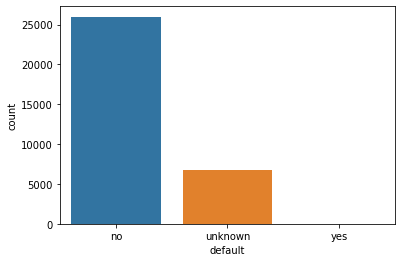

In [124]:
# figuring out default and credit

default_yes=data[data['default']=='yes']
default_no=data[data['default']=='no']
default_unknown=data[data['default']=='unknown']
total=data.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
unknown=default_unknown.count()['y']
sns.countplot(data['default'])
print("Total Count",total)
print("yes percentage",(yes/total)*100)
print("No percentage",(no/total*100))
print("unknown percentage",(unknown/total*100))

In [125]:
# no one has or very little amount of clients have default in thier credit.
# 79% of clients have non default in thier credit.
# nearly 21% of clients credit and default information is unknown.

In [126]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [127]:
#Handling Outliers

admin.           0.250671
blue-collar      0.226047
technician       0.163981
services         0.095234
management       0.072043
retired          0.041377
entrepreneur     0.035854
self-employed    0.034114
housemaid        0.026211
unemployed       0.024594
student          0.021665
unknown          0.008208
Name: job, dtype: float64


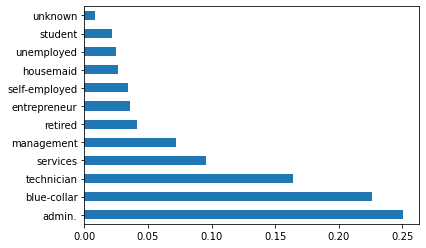

In [128]:
print(data.job.value_counts(normalize=True))

data.job.value_counts(normalize=True).plot.barh()
plt.show()

university.degree      0.294794
high.school            0.230471
basic.9y               0.146314
professional.course    0.127853
basic.4y               0.102252
basic.6y               0.055718
unknown                0.042109
illiterate             0.000488
Name: education, dtype: float64


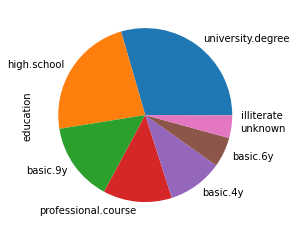

In [129]:
print(data.education.value_counts(normalize=True))

data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [130]:
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

Total counts
We have  52.615037226901016  % who have house loan and count is  17243
We have  44.99267667521055  % who have dont house loan and count is  14745
We have  2.3922860978884417  % of clients whose information is unknown  784


Total that have housing loan are 17243
Out of the total 11.57571188308299  % have subscribed to Term Deposit Plan
Out of the total 88.42428811691701  % have not subscribed to Term Deposit Plan
Out of the total 0.0  % of clients whose information is unknown


Total number of people that don't housing loan are 14745
Out of the total 10.81044421837911  % have subscribed to Term Deposit Plan
Out of the total 89.18955578162088  % have not subscribed to Term Deposit Plan
Out of the total 0.0  % of clients whose information is unknown




<AxesSubplot:xlabel='housing', ylabel='count'>

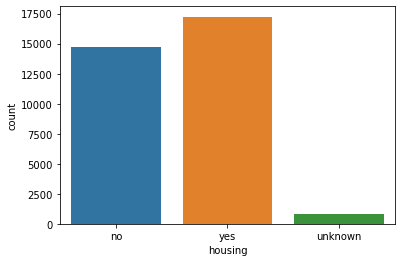

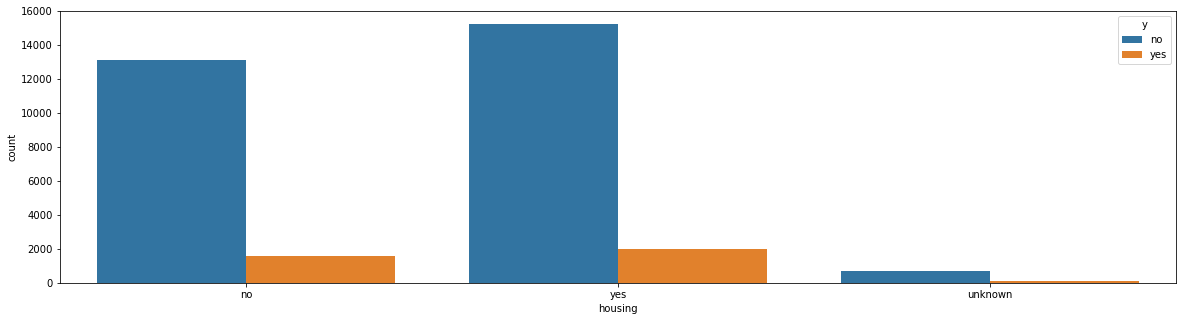

In [131]:
# lets do some analysis on housing column

default_yes=data[data['housing']=='yes']
default_no=data[data['housing']=='no']
default_unknown=data[data['housing']=='unknown']

total=data.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
unknown=default_unknown.count()['y']
sns.countplot(data['housing'])

print("Total counts")
print("We have ",(yes/total)*100," % who have house loan and count is ", yes)
print("We have ",(no/total)*100," % who have dont house loan and count is ",no)
print("We have ",(unknown/total)*100," % of clients whose information is unknown ",unknown)
print("\n")




yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
unknown=default_yes[default_yes['y']=='unknown'].count()['y']
total=default_yes.count()['y']
print("Total that have housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")
print("Out of the total",(unknown/total)*100," % of clients whose information is unknown")
print("\n")




yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
unknown=default_no[default_no['y']=='unknown'].count()['y']
total=default_no.count()['y']
print("Total number of people that don't housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")
print("Out of the total",(unknown/total)*100," % of clients whose information is unknown")
print("\n")




plt.figure(figsize=(20,5))
sns.countplot(data['housing'],hue=data['y'])

In [132]:
# From this analysis we can see that
# 1. There are more clients who have housing loan and also have subscribed to term deposit plan


In [133]:
# Let's analyse monthwise subscriptions

In [134]:
data['month'].value_counts()

may    10941
jul     5721
aug     4869
jun     4221
nov     3260
apr     2137
oct      580
sep      453
mar      444
dec      146
Name: month, dtype: int64

In [135]:


data.loc[data['month']=='mar','month']=3
data.loc[data['month']=='apr','month']=4
data.loc[data['month']=='may','month']=5
data.loc[data['month']=='jun','month']=6
data.loc[data['month']=='jul','month']=7
data.loc[data['month']=='aug','month']=8
data.loc[data['month']=='sep','month']=9
data.loc[data['month']=='oct','month']=10
data.loc[data['month']=='nov','month']=11
data.loc[data['month']=='dec','month']=12

In [138]:
dict1=dict(list(data.groupby(['month','y'])))
#print(dict1)
list1=[3,4,5,6,7,8,9,10,11,12]
no=[]
yes=[]
months=[]
for i in list1:
    months.append(i)
    for j in ['no','yes']:
        if(j=='no'):
            no.append(dict1[i,j].count()['y'])
        else:
            yes.append(dict1[i,j].count()['y'])

total_count_per_month=[]
dict2=dict(list(data.groupby(['month'])))
for i in list1:
    total_count_per_month.append(dict2[i].count()['y'])

      
print(months)
print(total_count_per_month)
print(yes)
print(no)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[444, 2137, 10941, 4221, 5721, 4869, 453, 580, 3260, 146]
[229, 431, 697, 459, 513, 502, 199, 255, 331, 66]
[215, 1706, 10244, 3762, 5208, 4367, 254, 325, 2929, 80]


In [139]:
month_wise=pd.DataFrame()
month_wise['Months']=months
month_wise['Total ENteries per month']=total_count_per_month
month_wise['Count of Subscribed']=yes
month_wise['Count of Not Sub']=no
month_wise['Subscription Rate']=(month_wise['Count of Subscribed']/month_wise['Total ENteries per month'])*100
month_wise['Not Sub Rate']=(month_wise['Count of Not Sub']/month_wise['Total ENteries per month'])*100

In [140]:
month_wise=month_wise.sort_values("Subscription Rate",ascending=False)
month_wise

,Months,Total ENteries per month,Count of Subscribed,Count of Not Sub,Subscription Rate,Not Sub Rate
0,3,444,229,215,51.576577,48.423423
9,12,146,66,80,45.205479,54.794521
7,10,580,255,325,43.965517,56.034483
6,9,453,199,254,43.929360,56.070640
1,4,2137,431,1706,20.168460,79.831540
3,6,4221,459,3762,10.874200,89.125800
5,8,4869,502,4367,10.310125,89.689875
8,11,3260,331,2929,10.153374,89.846626
4,7,5721,513,5208,8.966964,91.033036
2,5,10941,697,10244,6.370533,93.629467


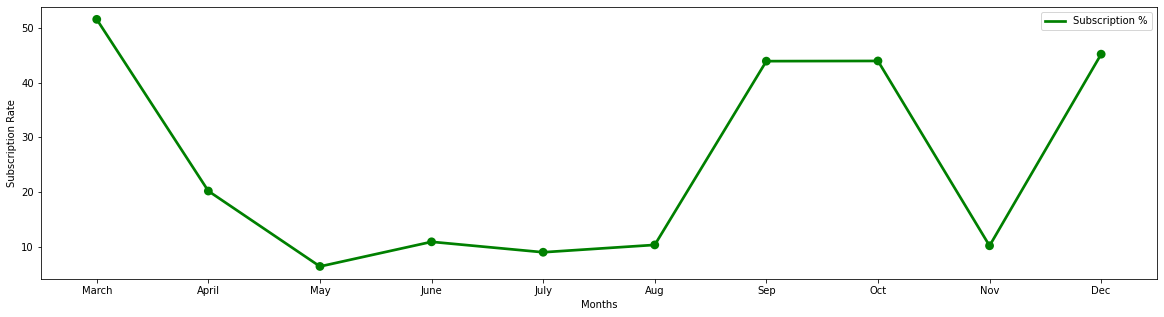

In [145]:
plt.figure(figsize=(20,5))
labels=['March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,10,1)
sns.pointplot(month_wise['Months'],month_wise['Subscription Rate'],color='g')
plt.xticks(position,labels)
plt.legend(['Subscription %'])


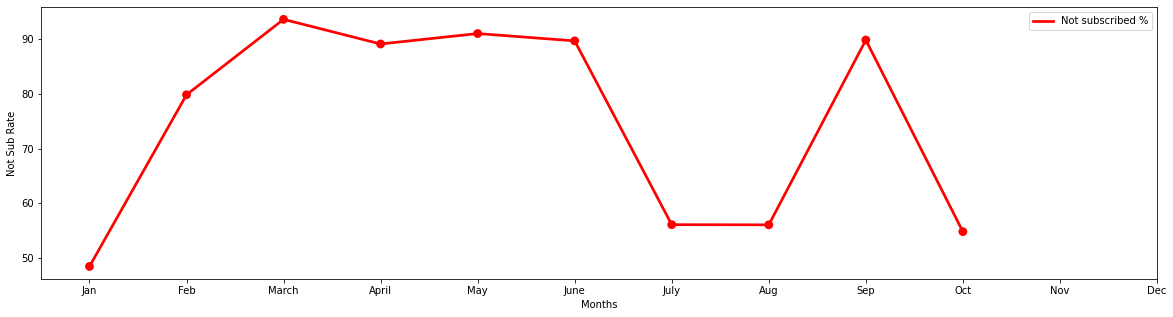

In [147]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,12,1)
sns.pointplot(month_wise['Months'],month_wise['Not Sub Rate'],color='r')
plt.xticks(position,labels)
plt.legend(['Not subscribed %'])

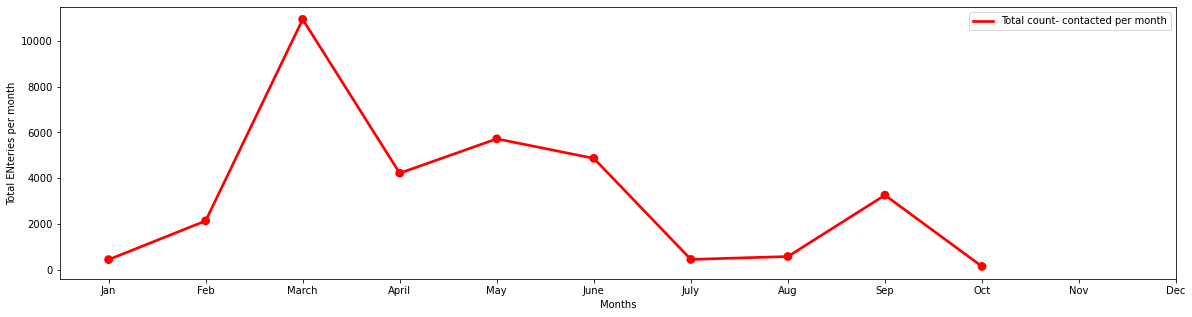

In [149]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,12,1)
sns.pointplot(month_wise['Months'],month_wise['Total ENteries per month'],color='r')
plt.xticks(position,labels)
plt.legend(['Total count- contacted per month'])

In [150]:
month_final=month_wise[['Months','Subscription Rate','Not Sub Rate']]
month_final=month_final.set_index('Months')

<AxesSubplot:xlabel='Months'>

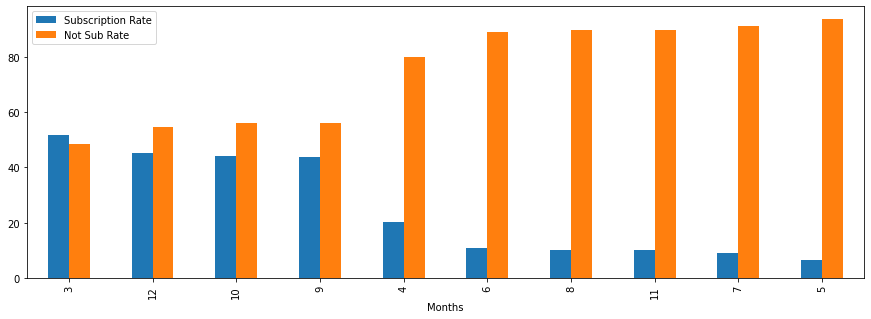

In [151]:
month_final.plot(kind='bar',figsize=(15,5))